# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# Load Dataset

In [ ]:
# Import dataset
df = pd.read_excel("laptop_price_idr.csv", index_col=False)

# Read the first 5 data
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_IDR
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1.388315e+07
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,9.315679e+06
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5.958702e+06
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2.629549e+07
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1.869063e+07


In [ ]:
# Drop column Unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_IDR
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1.388315e+07
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,9.315679e+06
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5.958702e+06
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2.629549e+07
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1.869063e+07


In [ ]:
# Check the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_IDR         1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [ ]:
# Check statistics dataset

# Numeric column
df.describe()

,Inches,Price_IDR
count,1303.000000,1.303000e+03
mean,15.017191,1.164472e+07
std,1.426304,7.243803e+06
min,10.100000,1.803155e+06
25%,14.000000,6.207413e+06
50%,15.600000,1.012461e+07
75%,15.600000,1.541884e+07
max,18.400000,6.320369e+07


In [ ]:
# Categorical column
df.describe(include=[object])

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


In [ ]:
# Check missing value
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


There were no missing value in the dataset

In [ ]:
# Check duplicated data
df.duplicated().sum()

29

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check duplicated data again
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

## Distribution of companies and type name

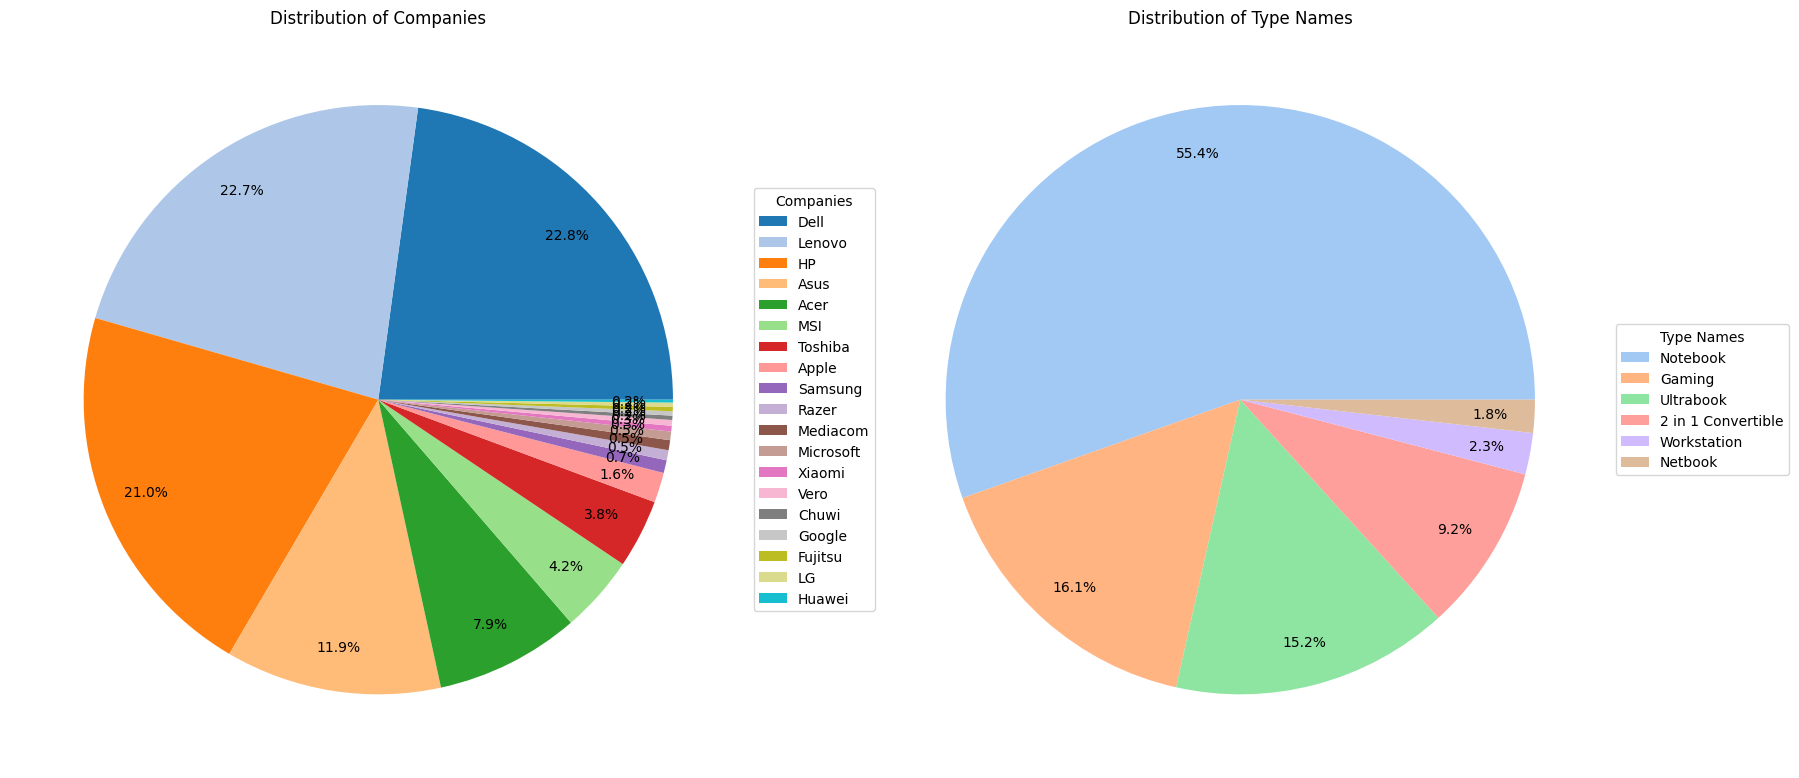

In [ ]:
# Count the number of laptops for each company
company_distribution = df['Company'].value_counts()

# Count the number of laptops for each TypeName
type_distribution = df['TypeName'].value_counts()

# Use a color palette with enough distinct colors for both charts
company_palette = sns.color_palette("tab20", len(company_distribution))
type_palette = sns.color_palette("pastel", len(type_distribution))

# Create the figure with two subplots side by side
plt.figure(figsize=(18, 8))

# Plot the pie chart for company distribution
plt.subplot(1, 2, 1)
wedges1, texts1, autotexts1 = plt.pie(
    company_distribution,
    autopct='%1.1f%%',
    colors=company_palette,
    pctdistance=0.85
)
plt.legend(wedges1, company_distribution.index, title="Companies", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Companies')

# Plot the pie chart for TypeName distribution
plt.subplot(1, 2, 2)
wedges2, texts2, autotexts2 = plt.pie(
    type_distribution,
    autopct='%1.1f%%',
    colors=type_palette,
    pctdistance=0.85
)
plt.legend(wedges2, type_distribution.index, title="Type Names", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Type Names')

plt.tight_layout()
plt.show()

- Dell, Lenovo, and HP dominate the market with nearly equal percentages. This indicates that these three brands have a significant market share and are top choices among consumers.

- The dominance of notebooks indicates that traditional laptop designs remain relevant. However, the increasing popularity of gaming laptops and ultrabooks suggests a shift in trends toward higher-specification laptops and more flexible designs.

## Price Distribution by Company

<ipython-input-11-a96115679bd2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='Price_IDR', data=df, palette=palette)


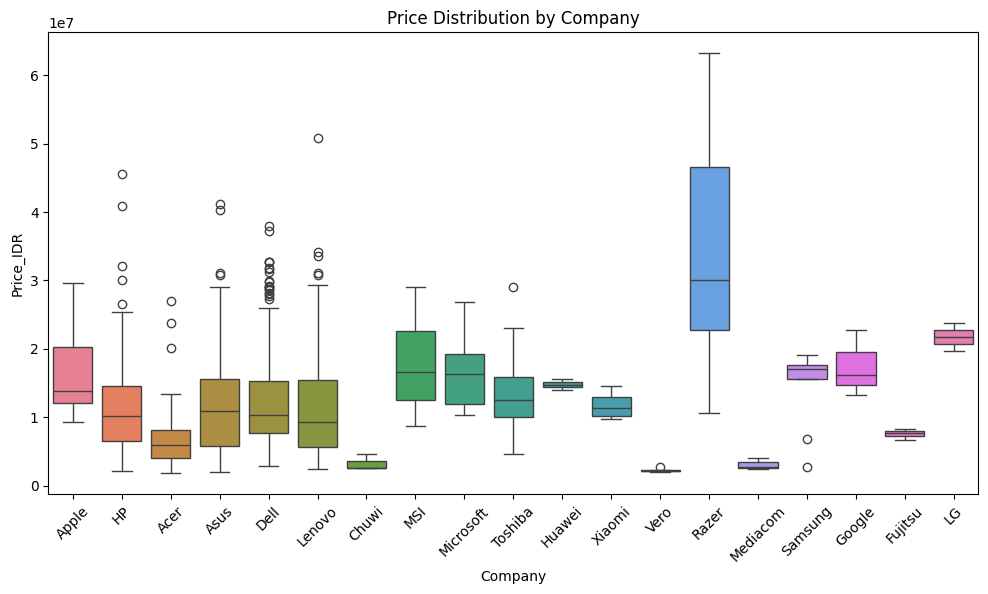

In [ ]:
# Define a color palette (you can use any Seaborn color palette or create a custom one)
palette = sns.color_palette("husl", len(df['Company'].unique()))

# Create the box plot with varying colors
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price_IDR', data=df, palette=palette)
plt.title('Price Distribution by Company')
plt.xticks(rotation=45)
plt.show()

- Brands like Chuwi, Vero, and Media.com have lower price ranges. This indicates that they are more focused on the entry-level market or laptops with simpler specifications.

- Brands like Razer tend to have higher price ranges compared to other brands. This may be due to the brand's reputation, build quality, or exclusive features they offer.

## Top Most Expensive Laptops

<ipython-input-12-fea2422e638c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Price_IDR', y='Label', data=top_10_expensive, palette=palette)
<ipython-input-12-fea2422e638c>:17: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.barplot(x='Price_IDR', y='Label', data=top_10_expensive, palette=palette)


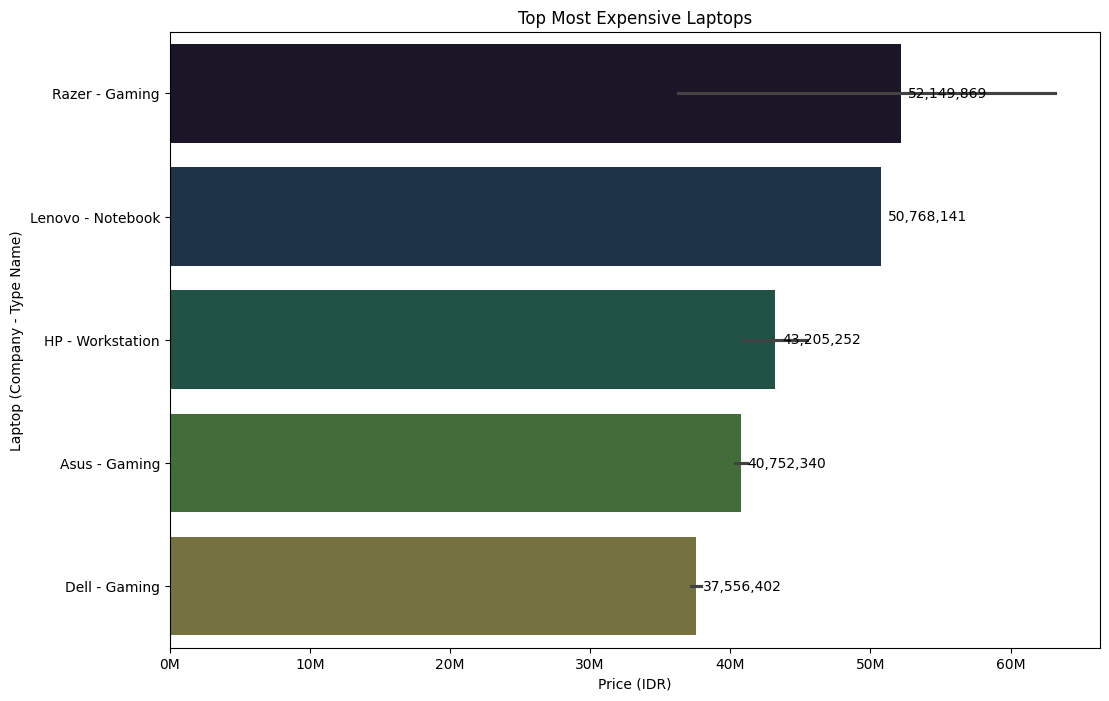

In [ ]:
# Convert 'Price_IDR' to a more readable format
df['Price_IDR'] = df['Price_IDR'].astype(int)

# Find the most expensive laptops
top_10_expensive = df.nlargest(10, 'Price_IDR')

# Create a new column for combined labels
top_10_expensive['Label'] = top_10_expensive['Company'] + ' - ' + top_10_expensive['TypeName']

# Create the plot
plt.figure(figsize=(12, 8))

# Use a vibrant color palette
palette = sns.color_palette("cubehelix", len(top_10_expensive))

# Plot horizontal bar chart with the specified palette
ax = sns.barplot(x='Price_IDR', y='Label', data=top_10_expensive, palette=palette)

# Add labels and title
plt.xlabel('Price (IDR)')
plt.ylabel('Laptop (Company - Type Name)')
plt.title('Top Most Expensive Laptops')

# Format x-axis labels to show in millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Annotate bars with the actual price values
for p in ax.patches:
    width = p.get_width()
    label = f'{width:,.0f}'  # Format the width with thousands separator
    ax.annotate(label, (width, p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points',
                ha='left', va='center')

# Show the plot
plt.show()

# Data Preprocessing

## Encoding

In [ ]:
# Display unique values for each column of type 'object'
for col in df.select_dtypes(include='object').columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n")

Unique values in column 'Company':
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


Unique values in column 'TypeName':
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


Unique values in column 'ScreenResolution':
['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K Ultra HD 3840x2160' 'Touchscre

In [ ]:
# List of columns to encode
columns_to_encode = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the columns to encode
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

# Display the first 5 rows of the encoded DataFrame
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_IDR
0,1.0,4.0,13.3,23.0,65.0,8GB,4.0,58.0,8.0,1.37kg,13883153
1,1.0,4.0,13.3,1.0,63.0,8GB,2.0,51.0,8.0,1.34kg,9315679
2,7.0,3.0,15.6,8.0,74.0,8GB,16.0,53.0,4.0,1.86kg,5958702
3,1.0,4.0,15.4,25.0,85.0,16GB,29.0,9.0,8.0,1.83kg,26295492
4,1.0,4.0,13.3,23.0,67.0,8GB,16.0,59.0,8.0,1.37kg,18690634


In [ ]:
# Display unique values for each numeric column
for col in df.select_dtypes(include='number').columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n")

Unique values in column 'Company':
[ 1.  7.  0.  2.  4. 10.  3. 11. 13. 16.  8. 18. 17. 14. 12. 15.  6.  5.
  9.]


Unique values in column 'TypeName':
[4. 3. 2. 1. 0. 5.]


Unique values in column 'Inches':
[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]


Unique values in column 'ScreenResolution':
[23.  1.  8. 25.  0. 15. 22. 13.  7. 35. 28. 37. 31.  9. 11. 17.  5. 39.
  2. 12.  6. 36. 14. 10. 18. 24. 38.  4. 20. 21. 19. 27.  3. 16. 26. 30.
 34. 32. 33. 29.]


Unique values in column 'Cpu':
[ 65.  63.  74.  85.  67.  14.  84. 106.  83.  56.  86.  51.  97.  87.
  59.  30.  77.  22.  62. 107.  29.  20.   8.  37.  60. 102.  64.  26.
 113.  31.  36.  61.  24.  98.  16.  68.  47.  80.  55.   9.  95.  81.
 103. 114.  89.  19.   2.  10.  66.  91.  54.  32. 104.   0.  99.  11.
  33. 112.   4.  78.   5.  41.  35.  72.  94.  25. 105.  79. 100. 101.
  52.  82.  92.  58.   1.  17.  38.  15.  93.  48. 116.  40.  71.  57.
  21.  34.  49.  13.  70.   7.

## Remove the GB tag in column Ram, so that it can display just the number

In [ ]:
# Remove the 'GB' tag in the 'Ram' column to display just the number
df['Ram'] = df['Ram'].str.replace('GB', '').str.strip().astype(int)

# Check unique value again for column 'Ram'
df['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

## Remove the Kg tag in column Weight, so that it can display just the number

In [ ]:
# Remove the 'kg' tag in the 'Weight' column to display just the number
df['Weight'] = df['Weight'].str.replace('kg', '').str.strip().astype(float)

# Check unique value again for column 'Ram'
df['Weight'].unique()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

## Dataset final

In [ ]:
# Display DataFrame
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_IDR
0,1.0,4.0,13.3,23.0,65.0,8,4.0,58.0,8.0,1.37,13883153
1,1.0,4.0,13.3,1.0,63.0,8,2.0,51.0,8.0,1.34,9315679
2,7.0,3.0,15.6,8.0,74.0,8,16.0,53.0,4.0,1.86,5958702
3,1.0,4.0,15.4,25.0,85.0,16,29.0,9.0,8.0,1.83,26295492
4,1.0,4.0,13.3,23.0,67.0,8,16.0,59.0,8.0,1.37,18690634


## Export DataFrame Final

In [ ]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('data_clean_price_laptop.csv', index=False)

# Splitting Data

In the features, I did not use weight because the technical test question did not include the weight column for the prediction attempt. Therefore, I did not use it.

In [ ]:
# Define features and target variable
X = df.drop(['Price_IDR', 'Weight'], axis=1)
y = df['Price_IDR']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Machine Learning

## Trainning using different model machine learning

In [ ]:
# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_elements = y_true != 0
    return (abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements])).mean() * 100

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'SVR': SVR()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    results[name] = {
        'Mean Squared Error': mse,
        'R^2 Score': r2,
        'MAPE': mape
    }

# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']:.2f}")
    print(f"R^2 Score: {metrics['R^2 Score']:.2f}")
    print(f"MAPE: {metrics['MAPE']:.2f}%\n")

Model: Linear Regression
Mean Squared Error: 22478435541227.99
R^2 Score: 0.65
MAPE: 30.29%

Model: Ridge Regression
Mean Squared Error: 22478491058918.92
R^2 Score: 0.65
MAPE: 30.28%

Model: Lasso Regression
Mean Squared Error: 22478435457983.71
R^2 Score: 0.65
MAPE: 30.29%

Model: Decision Tree
Mean Squared Error: 20411932437266.88
R^2 Score: 0.69
MAPE: 19.80%

Model: Random Forest
Mean Squared Error: 10217912698163.55
R^2 Score: 0.84
MAPE: 15.90%

Model: XGBoost
Mean Squared Error: 11051924272253.90
R^2 Score: 0.83
MAPE: 15.40%

Model: SVR
Mean Squared Error: 69400860974095.39
R^2 Score: -0.07
MAPE: 56.30%



From the machine learning model training results, it can be concluded that the best model is XGBoost with a MAPE of 15.40%, an MSE of 11051924272253.90
, and an R² score of 0.83.

## Using XGBoost for predict

In [ ]:
# Define features and target variable
X = df.drop(['Price_IDR', 'Weight'], axis=1)
y = df['Price_IDR']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the pipeline
pipeline = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('model', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Define a function to make a prediction based on manual input
def predict_price(input_data):
    # Clean the input data
    input_data['Inches'] = float(input_data['Screen Size'].replace(' inches', ''))
    input_data['Ram'] = int(input_data['Memory'].replace('GB RAM', '').strip())
    input_data['Memory'] = input_data['Storage']

    # Rename input data keys to match the DataFrame columns
    input_data = {
        'Company': input_data['Company'],
        'TypeName': input_data['TypeName'],
        'Inches': input_data['Inches'],
        'ScreenResolution': input_data['Resolution'],
        'Cpu': input_data['Cpu'],
        'Ram': input_data['Ram'],
        'Memory': input_data['Memory'],
        'Gpu': input_data['Graphics'],
        'OpSys': input_data['Operating System']
    }

    # Create a DataFrame for the input data
    input_df = pd.DataFrame([input_data])

    # Encode the input data
    encoded_input = encoder.transform(input_df[columns_to_encode])
    input_df[columns_to_encode] = encoded_input

    # Predict the price
    prediction = pipeline.predict(input_df)
    return prediction[0]

# Example input
input_data = {
    'Company': 'Dell',
    'TypeName': 'Notebook',
    'Screen Size': '17.3 inches',
    'Resolution': 'Full HD 1920x1080',
    'Cpu': 'Intel Core i7 8550U 1.8GHz',
    'Memory': '16GB RAM',
    'Storage': '512GB SSD',
    'Graphics': 'AMD Radeon 530',
    'Operating System': 'Linux'
}

# Predict the price
predicted_price = predict_price(input_data)
print(f"Predicted Price: {predicted_price:,.0f} IDR")

Predicted Price: 13,134,233 IDR
